1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg)

0.9999999999999999 -0.9499999999999995


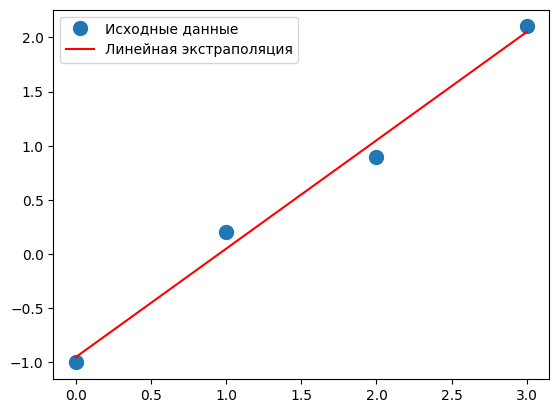

In [27]:
#1.1.1 Пример
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m,c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m,c)

plt.plot(x,y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x+c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()


[-5.20181157 -4.33435512 -3.39830073 -1.52627385 -1.01043162  0.41360668
  0.80661581  2.08126115  3.03477972  3.91163141  4.61442482]
[25.09787971 16.37286392  8.85966117  4.24848226  0.73778222 -0.31399672
  1.47089725  4.29961516  9.18950415 15.82768359 25.04271137]


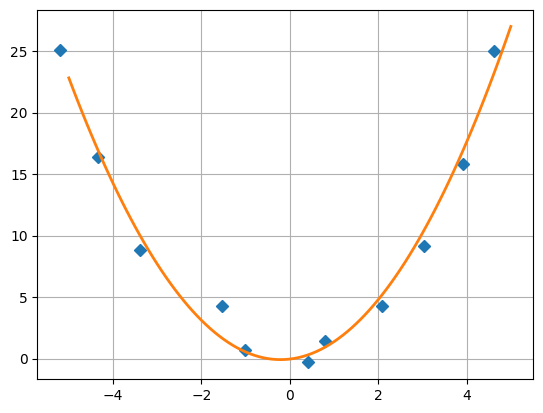

In [28]:
#1.1.2 Пример

from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**2, x, ones(11))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = linspace(-5,5,101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0]* x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)

plt.grid()

plt.savefig('Парабола.png')

[-5.30432736 -3.77971817 -2.69947071 -2.0743884  -0.62375755 -0.1288664
  0.90200988  2.42032102  3.37403465  3.97072959  4.60897452]
[25.12577007 16.26785431  8.51748857  4.31471521  1.46309288  0.24028338
  0.90819022  3.79370575  9.47590681 15.96061992 25.38011975]


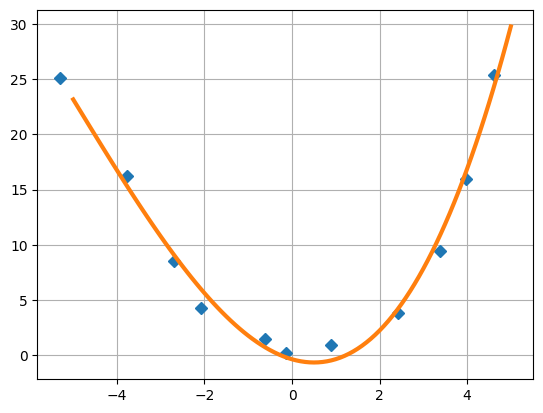

In [29]:
#1.1.3 Пример
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**3, x**2, x, ones(11))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = linspace(-5,5,101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0]* x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec+s[3], '-', lw=3)

plt.grid()

plt.savefig('Полином 3-й степени.png')

[-9.99724032 -9.19721408 -8.0760197  -7.03645427 -5.3810069  -4.94426083
 -3.76110673 -2.52310974 -1.25414698 -0.71754152  0.3512298   1.15303822
  2.80147681  3.70082592  4.26044922  5.33741086  6.4466653   8.32825418
  8.82156059 10.14603446]
[1.00057350e+02 8.01641461e+01 6.18699924e+01 4.72314546e+01
 3.36437562e+01 2.21006546e+01 1.40563475e+01 6.96542893e+00
 2.74944005e+00 6.99807254e-02 4.64760878e-01 2.30916809e+00
 7.40941723e+00 1.36215024e+01 2.20983556e+01 3.38680803e+01
 4.65710880e+01 6.27321338e+01 7.99686915e+01 1.00358015e+02]


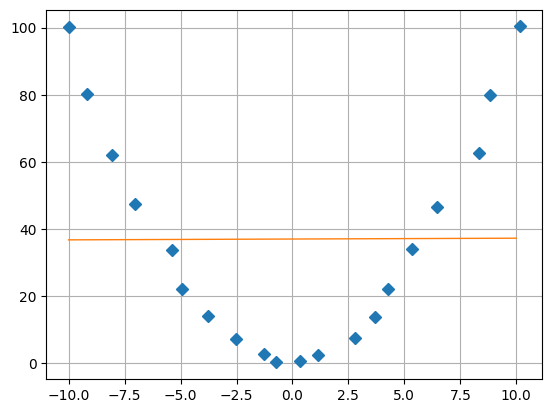

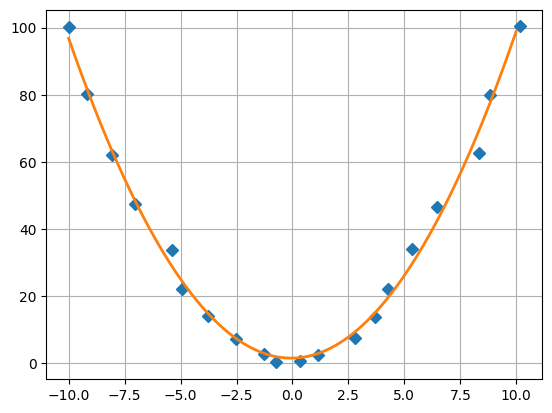

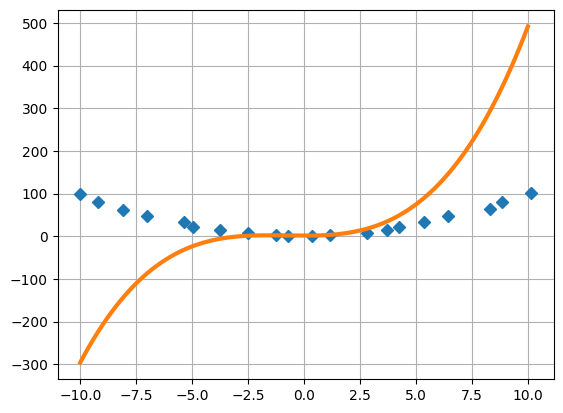

In [30]:
#1.1.1 Задание
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-10,10,20)
y = x**2+delta*(rand(20)-0.5)
x+=delta*(rand(20)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x, ones(20))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = linspace(-10,10,201)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0]* x_prec + s[1], '-', lw=1)

plt.grid()

plt.savefig('Полином 1-й степени.png')

plt.show()

#----------------------------------

m = vstack((x, x**2, ones(20))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = linspace(-10,10,201)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0]* x_prec + s[1]*x_prec**2 + s[2], '-', lw=2)

plt.grid()

plt.savefig('Полином 2-й степени.png')

plt.show()

#-----------------------------------------------

m = vstack((x, x**2, x**3, ones(20))).T

s = np.linalg.lstsq(m,y,rcond = None)[0]

x_prec = linspace(-10,10,201)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0]* x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec+s[3], '-', lw=3)

plt.grid()

plt.savefig('Полином 1-й степени.png')

0.0001995293621113931
0.0970029145757182


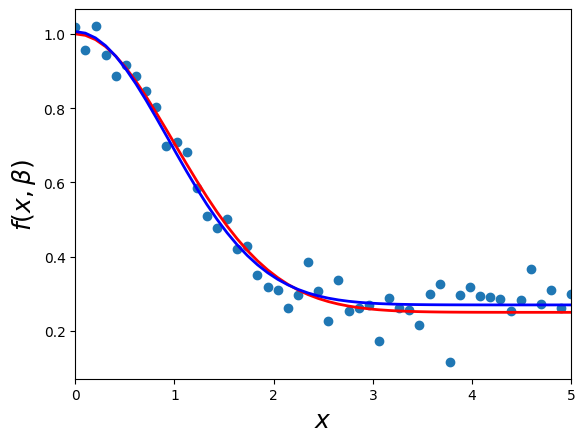

In [31]:
#1.1.4 Пример
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit

beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0+b1*np.exp(-b2*x**2)

xdata = np.linspace(0,5,50)

y = f(xdata, *beta)

ydata = y+0.05*np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)

#Линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратное откл.
residuals = ydata-f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

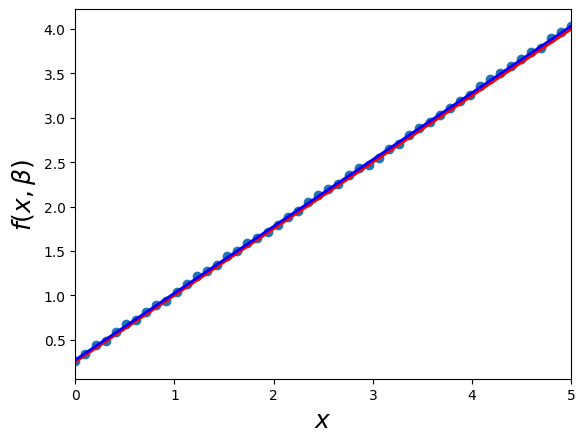

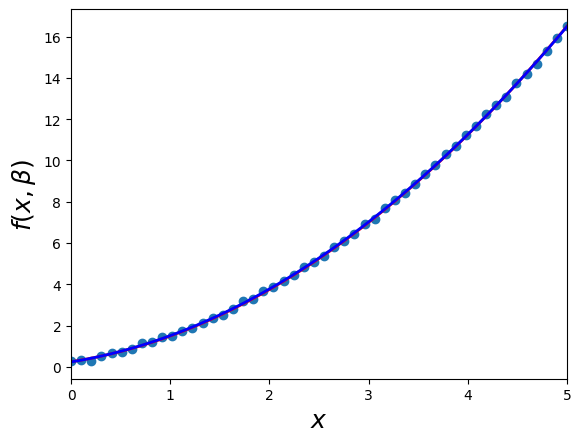

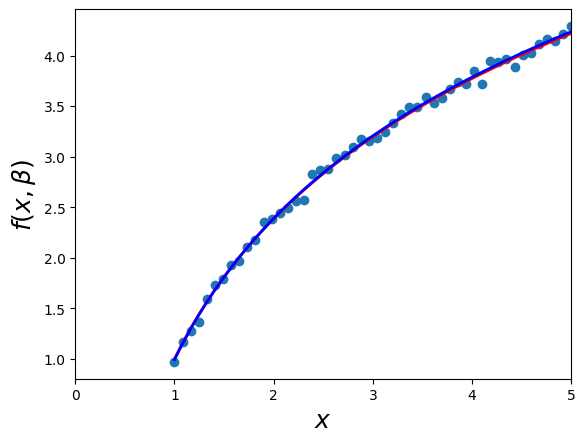

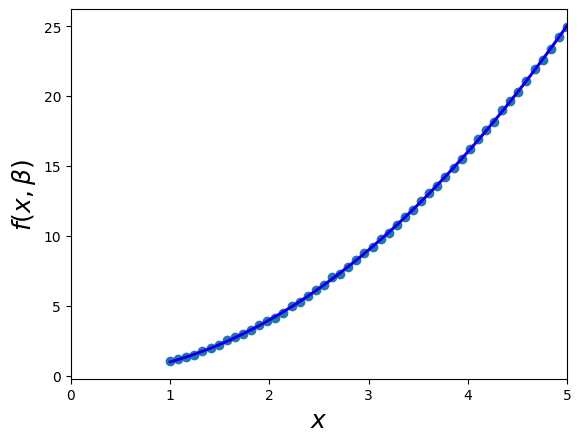

In [32]:
#1.1.5 Пример

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from random import randint, random
##1
beta = (0.25, 0.75)

def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)

fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##2
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1,b2):
    return b0 + b1 * x + b2 * x**2
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
line_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()\

##3
beta = (1,2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##4
beta = (1,2)
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


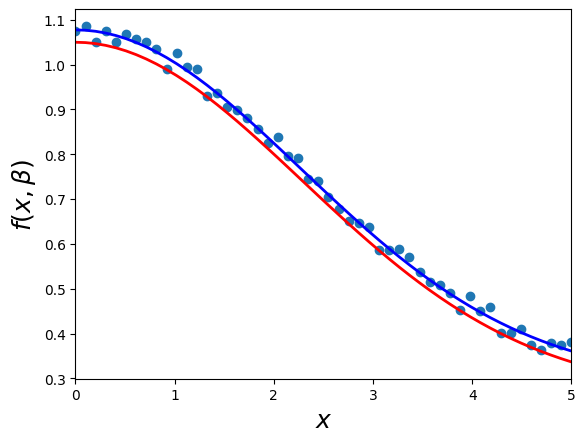

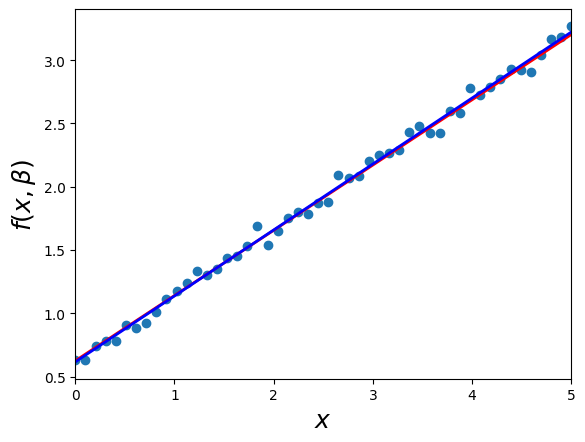

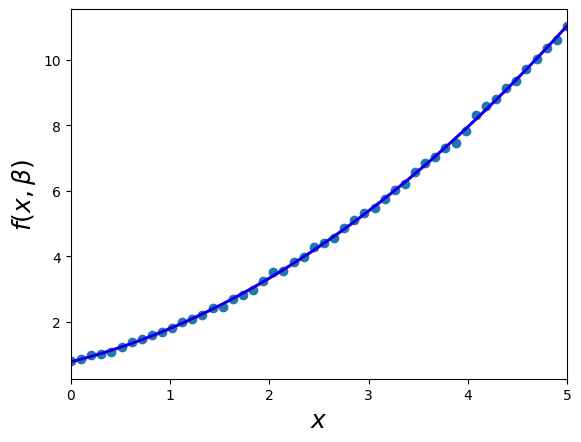

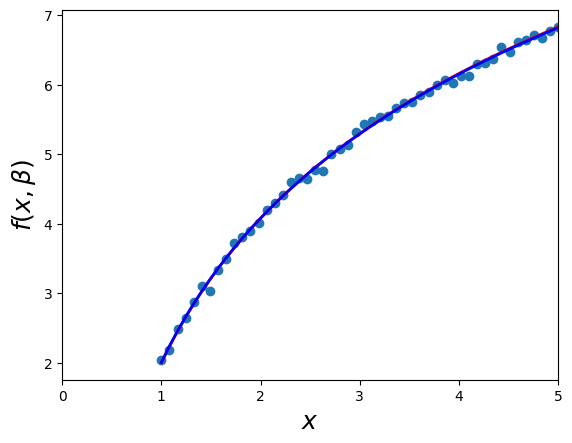

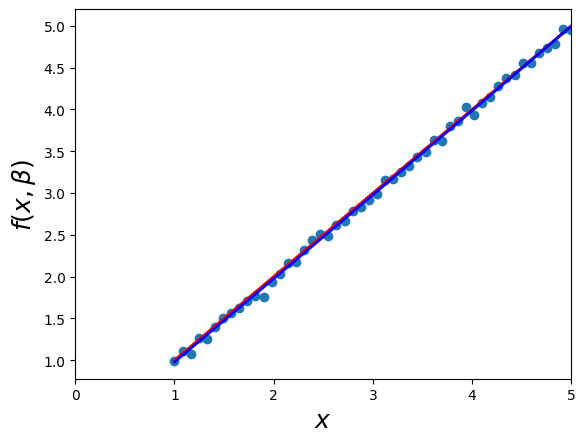

In [33]:
#Задание
#Задание 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from random import randint, random
##0
beta = (random(), random(), random())

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##1
beta = (random(), random())
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
line_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()\

##2
beta = (random(), random(), random())
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##3
beta = (randint(1, 4), randint(1, 4))
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

##4
beta = (randint(1, 3), randint(1, 3))
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

1.2. Теоретический материал – Задачи регрессии
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

(20, 2)


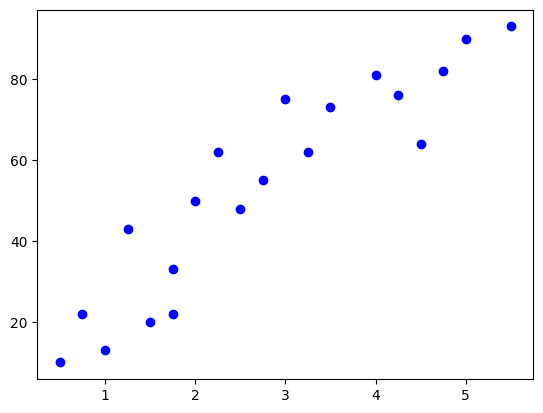

In [34]:
#1.2.1 Пример

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 
                             5.00, 5.50],
            'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

#исследуем набор данных
print(dataset.shape)
dataset.describe()

#нарисуем точечную диаграмму

plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel = "Часы"
plt.ylabel = "Оценка"
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [35]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код

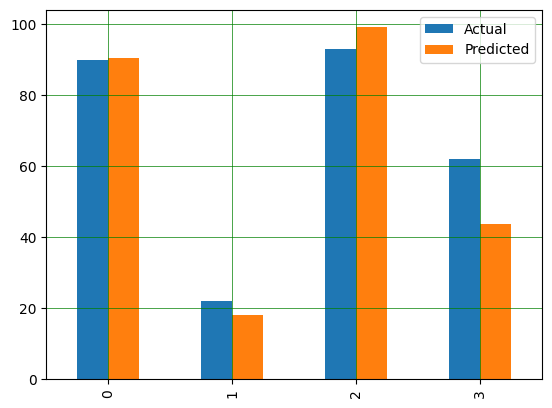

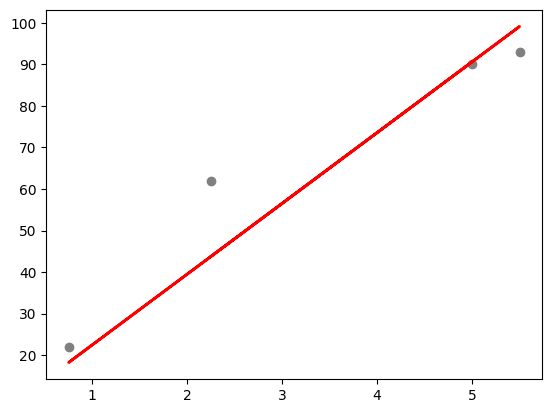

In [36]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)


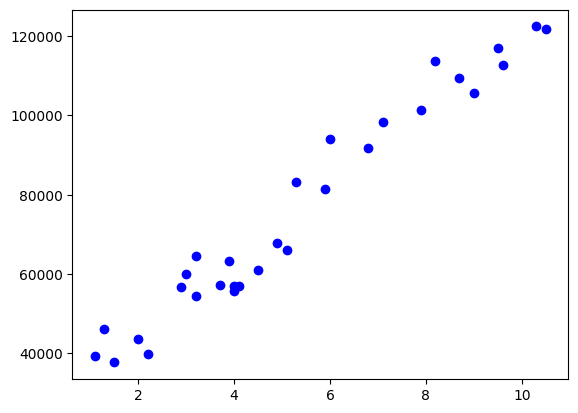

26780.09915062818
[9312.57512673]


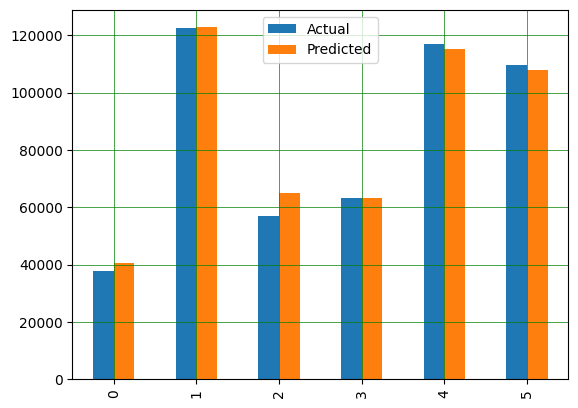

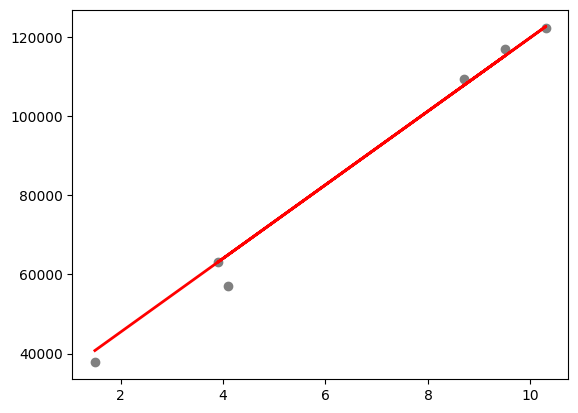

In [37]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
dataset.head()
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Работник")
plt.xlabel = "Стаж работы"
plt.ylabel = "Зарплата"
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

In [46]:
#Пример 1 3 1
import numpy as np

Y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y = np.array(Y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)

new_x = np.array(X)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)

df1 = df1.rename(columns={0:'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1:'x2', 2: 'x3'}, inplace=False)

frames = [df1,df2]
dataset = pd.concat([df1,df2], axis = 1, join="inner")
dataset.head()

print(dataset.shape)
dataset.describe()

X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"])
coeff_df
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))


(23, 4)
Mean squared error: 1.327269924234306


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
dataset.head()
print(dataset.shape,'\n')
dataset.describe()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


df1 = pd.DataFrame(y)
df2 = pd.DataFrame(X)

df1 = df1.rename(columns = {0: 'PtrlConsump'}, inplace = False)
df2 = df2.rename(columns = {0: 'PtrlTax', 1: 'AvgInc', 2: 'PvdHighways', 3: 'PptnDrvrlicence(%)'}, inplace = False)
print("Petrol tax, Average income, Paved Highways, Population Driver licence(%), Petrol Consumption",'\n')
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset,'\n')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df,'\n')

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df,'\n')

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

(48, 5) 

Petrol tax, Average income, Paved Highways, Population Driver licence(%), Petrol Consumption 

    PtrlConsump  PtrlTax  AvgInc  PvdHighways  PptnDrvrlicence(%)
0           541     9.00  3571.0       1976.0               0.525
1           524     9.00  4092.0       1250.0               0.572
2           561     9.00  3865.0       1586.0               0.580
3           414     7.50  4870.0       2351.0               0.529
4           410     8.00  4399.0        431.0               0.544
5           457    10.00  5342.0       1333.0               0.571
6           344     8.00  5319.0      11868.0               0.451
7           467     8.00  5126.0       2138.0               0.553
8           464     8.00  4447.0       8577.0               0.529
9           498     7.00  4512.0       8507.0               0.552
10          580     8.00  4391.0       5939.0               0.530
11          471     7.50  5126.0      14186.0               0.525
12          525     7.00  4817.0     